/Users/wriju/miniconda3/envs/cta/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


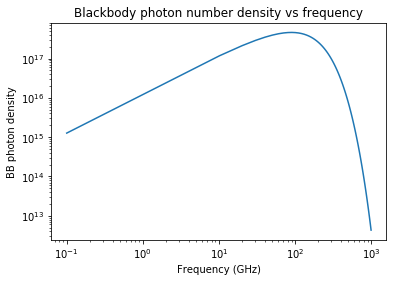

In [1]:
from astropy import units as u
import numpy as np
from astropy.constants import k_B, hbar, c
import matplotlib.pyplot as plt

%matplotlib inline

def _softphoton_dist(e, T):
        """ Blackbody spectrum : No. of photons / energy / cm3
        Parameters
        ----------
        e : 'astropy.units.Quantity' float
            energy of photon (in eV)

        T : 'astropy.units.Quantity' float
            Temperature of Blackbody (in Kelvin)
        """
        kT = (k_B * T).to('TeV')
        hc = hbar.to('TeV s') * c.cgs
        norm = 1 / ( (hc **3) * (np.pi ** 2) )
        num = e.to('TeV') ** 2
        denom = (np.exp(e / kT)).value - 1
        
        return (norm * (num / denom)).value
    
fr_low = 0.1 * u.GHz
en_low = fr_low.to('eV', equivalencies = u.spectral())
fr_hi = 1000 * u.GHz
en_hi = fr_hi.to('eV', equivalencies = u.spectral())

e_array = np.linspace(en_low, en_hi, 100)
f_array = np.linspace(fr_low, fr_hi, 100)
T = 2.7 * u.K

n_soft = []

for i, e in enumerate(e_array):
    n_soft.append(_softphoton_dist(e, T))

plt.loglog(f_array, n_soft)
plt.title('Blackbody photon number density vs frequency')
plt.xlabel('Frequency (GHz)')
plt.ylabel('BB photon density')


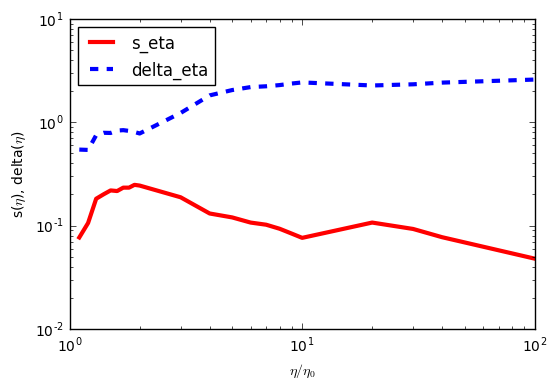

In [14]:
#Testing the smoothness of the s, eta, B values from Table-1 Kelner2008

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

eta_arr = np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0,
                            3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                            30.0, 40.0, 100.0])

s_arr = np.array([0.0768, 0.106, 0.182, 0.201, 0.219, 0.216, 0.233, 0.233,
                          0.248, 0.244, 0.188, 0.131, 0.120, 0.107, 0.102, 0.0932,
                          0.0838, 0.0761, 0.107, 0.0928, 0.0772, 0.0479])

delta_arr = np.array([0.544, 0.540, 0.750, 0.791, 0.788, 0.831, 0.839, 0.825,
                              0.805, 0.779, 1.23, 1.82, 2.05, 2.19, 2.23, 2.29, 2.37,
                              2.43, 2.27, 2.33, 2.42, 2.59])

B_arr = np.array([2.86E-019, 2.24E-018, 5.61E-018, 1.02E-017, 1.6E-017, 2.23E-017,
                          3.1E-017, 4.07E-017, 5.3E-017, 6.74E-017, 1.51E-016, 1.24E-016,
                          1.37E-016, 1.62E-016, 1.71E-016, 1.78E-016, 1.84E-016, 1.93E-016,
                          4.74E-016, 7.7E-016, 1.06E-015, 2.73E-015])

#lists = [s_arr, delta_arr, B_arr]
lists = [s_arr, delta_arr,]
#ls = ['-', '--', '-.']
ls = ['-', '--']
#colors = ['red', 'blue', 'green']
colors = ['red', 'blue']
#labels = ['s_eta', 'delta_eta', 'B_eta']
labels = ['s_eta', 'delta_eta']

for member, l, color, label in zip(lists, ls, colors, labels):
    plt.loglog(eta_arr, member, lw=3, color=color, ls=l, label=label)
    plt.xlabel('$\eta / {\eta_{0}}$')
    #plt.ylabel('s($\eta$), delta($\eta$), B($\eta$)')
    plt.ylabel('s($\eta$), delta($\eta$)' )
plt.legend(loc='best')
plt.show()